**Thêm thư viện**

In [252]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

**Lấy dữ liệu từ bộ MINST**

In [253]:
# Có 60K ảnh cho train và 10K ảnh cho test
(X_train, y_train), (X_test, y_test) = mnist.load_data()


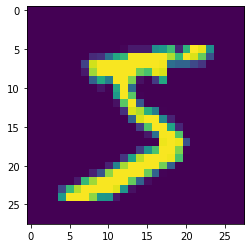

In [254]:
#Ảnh đầu vào có kích thước 28x28 là các chữ số
plt.imshow(X_train[0])

In [255]:
X_train.shape

(60000, 28, 28)

**Chuẩn hóa dữ liệu trong Keras**

In [256]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [257]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Xây dựng Model**

In [258]:
#Tạo model
model = Sequential()

#Thêm model layers
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same') )
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [259]:
# Deploy model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [260]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
_________________________________________________

In [261]:
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9475 - accuracy: 0.8763 - val_loss: 0.0829 - val_accuracy: 0.9720
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0837 - val_accuracy: 0.9766
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0537 - val_accuracy: 0.9834


In [262]:
y_hat= model.predict(X_test[19:20])
y_hat

array([[7.5879515e-15, 1.5916214e-13, 4.0668983e-17, 2.8291008e-15,
        1.0000000e+00, 2.5244919e-09, 7.6211932e-16, 1.4059065e-09,
        7.4418871e-14, 1.1662045e-09]], dtype=float32)

In [263]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([4])

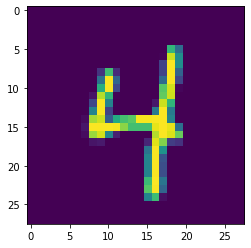

In [264]:
plt.imshow(X_test1[19])


In [265]:
np.argmax(y_test[:4], axis=1)

array([7, 2, 1, 0])

In [266]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.053686149418354034 / Test accuracy: 0.9833999872207642
